**PROBLEM STATEMENT** : Employee attrition or employees leaving an organization voluntarily or involuntarily represents a significant challenge for businesses. High attrition rates can lead to negative impact a company’s productivity and profitability. Based on the dataset, develop a predictive model that categorizes employees into "attrition" and "retention" groups based on historical employee data.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,classification_report,confusion_matrix
import pickle
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [7]:
train=pd.read_csv('train project.csv')
test=pd.read_csv('test project.csv')
df=pd.concat([train,test],ignore_index=True)
pd.set_option('display.max_columns', None)  
df

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,22,Associate Degree,Married,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,No,21,Master’s Degree,Divorced,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,No,11,Bachelor’s Degree,Married,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,No,27,High School,Single,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,71,High School,Divorced,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74493,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0,Yes,40,Associate Degree,Single,0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
74494,47175,30,Female,15,Education,3856,Good,Medium,Average,2,Yes,45,Master’s Degree,Married,0,Entry,Medium,20,No,No,No,Good,Medium,Left
74495,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0,No,4,Associate Degree,Married,4,Mid,Small,7,No,No,No,Good,High,Left
74496,9554,18,Male,4,Education,5276,Fair,High,Average,0,No,13,Bachelor’s Degree,Divorced,3,Mid,Large,5,No,No,No,Poor,High,Stayed


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               74498 non-null  int64 
 1   Age                       74498 non-null  int64 
 2   Gender                    74498 non-null  object
 3   Years at Company          74498 non-null  int64 
 4   Job Role                  74498 non-null  object
 5   Monthly Income            74498 non-null  int64 
 6   Work-Life Balance         74498 non-null  object
 7   Job Satisfaction          74498 non-null  object
 8   Performance Rating        74498 non-null  object
 9   Number of Promotions      74498 non-null  int64 
 10  Overtime                  74498 non-null  object
 11  Distance from Home        74498 non-null  int64 
 12  Education Level           74498 non-null  object
 13  Marital Status            74498 non-null  object
 14  Number of Dependents  

## Data Cleaning

In [12]:
df.duplicated().sum()

0

In [14]:
df.drop('Employee ID',axis=1,inplace=True)

In [16]:
df['Distance from Home']=(df['Distance from Home']*1.609).astype(int)

In [18]:
df['Years at Company']=(df['Years at Company']/12).round(1)

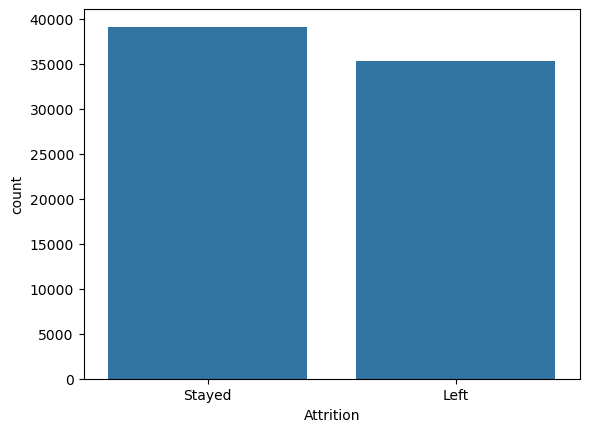

In [20]:
sns.countplot(data=df,x='Attrition')
plt.show()

## One Hot Encoding

In [23]:
df1=pd.get_dummies(df[['Gender','Job Role','Education Level']]).astype(int)
df=pd.concat([df,df1],axis=1)
df.drop(['Gender','Job Role','Education Level'],axis=1,inplace=True)

## Label Encoding

In [26]:
cat_cols = df.select_dtypes(include='object').columns
le=LabelEncoder()
for i in cat_cols:
    df[i]=le.fit_transform(df[i])

## Correlation Analysis

<Axes: >

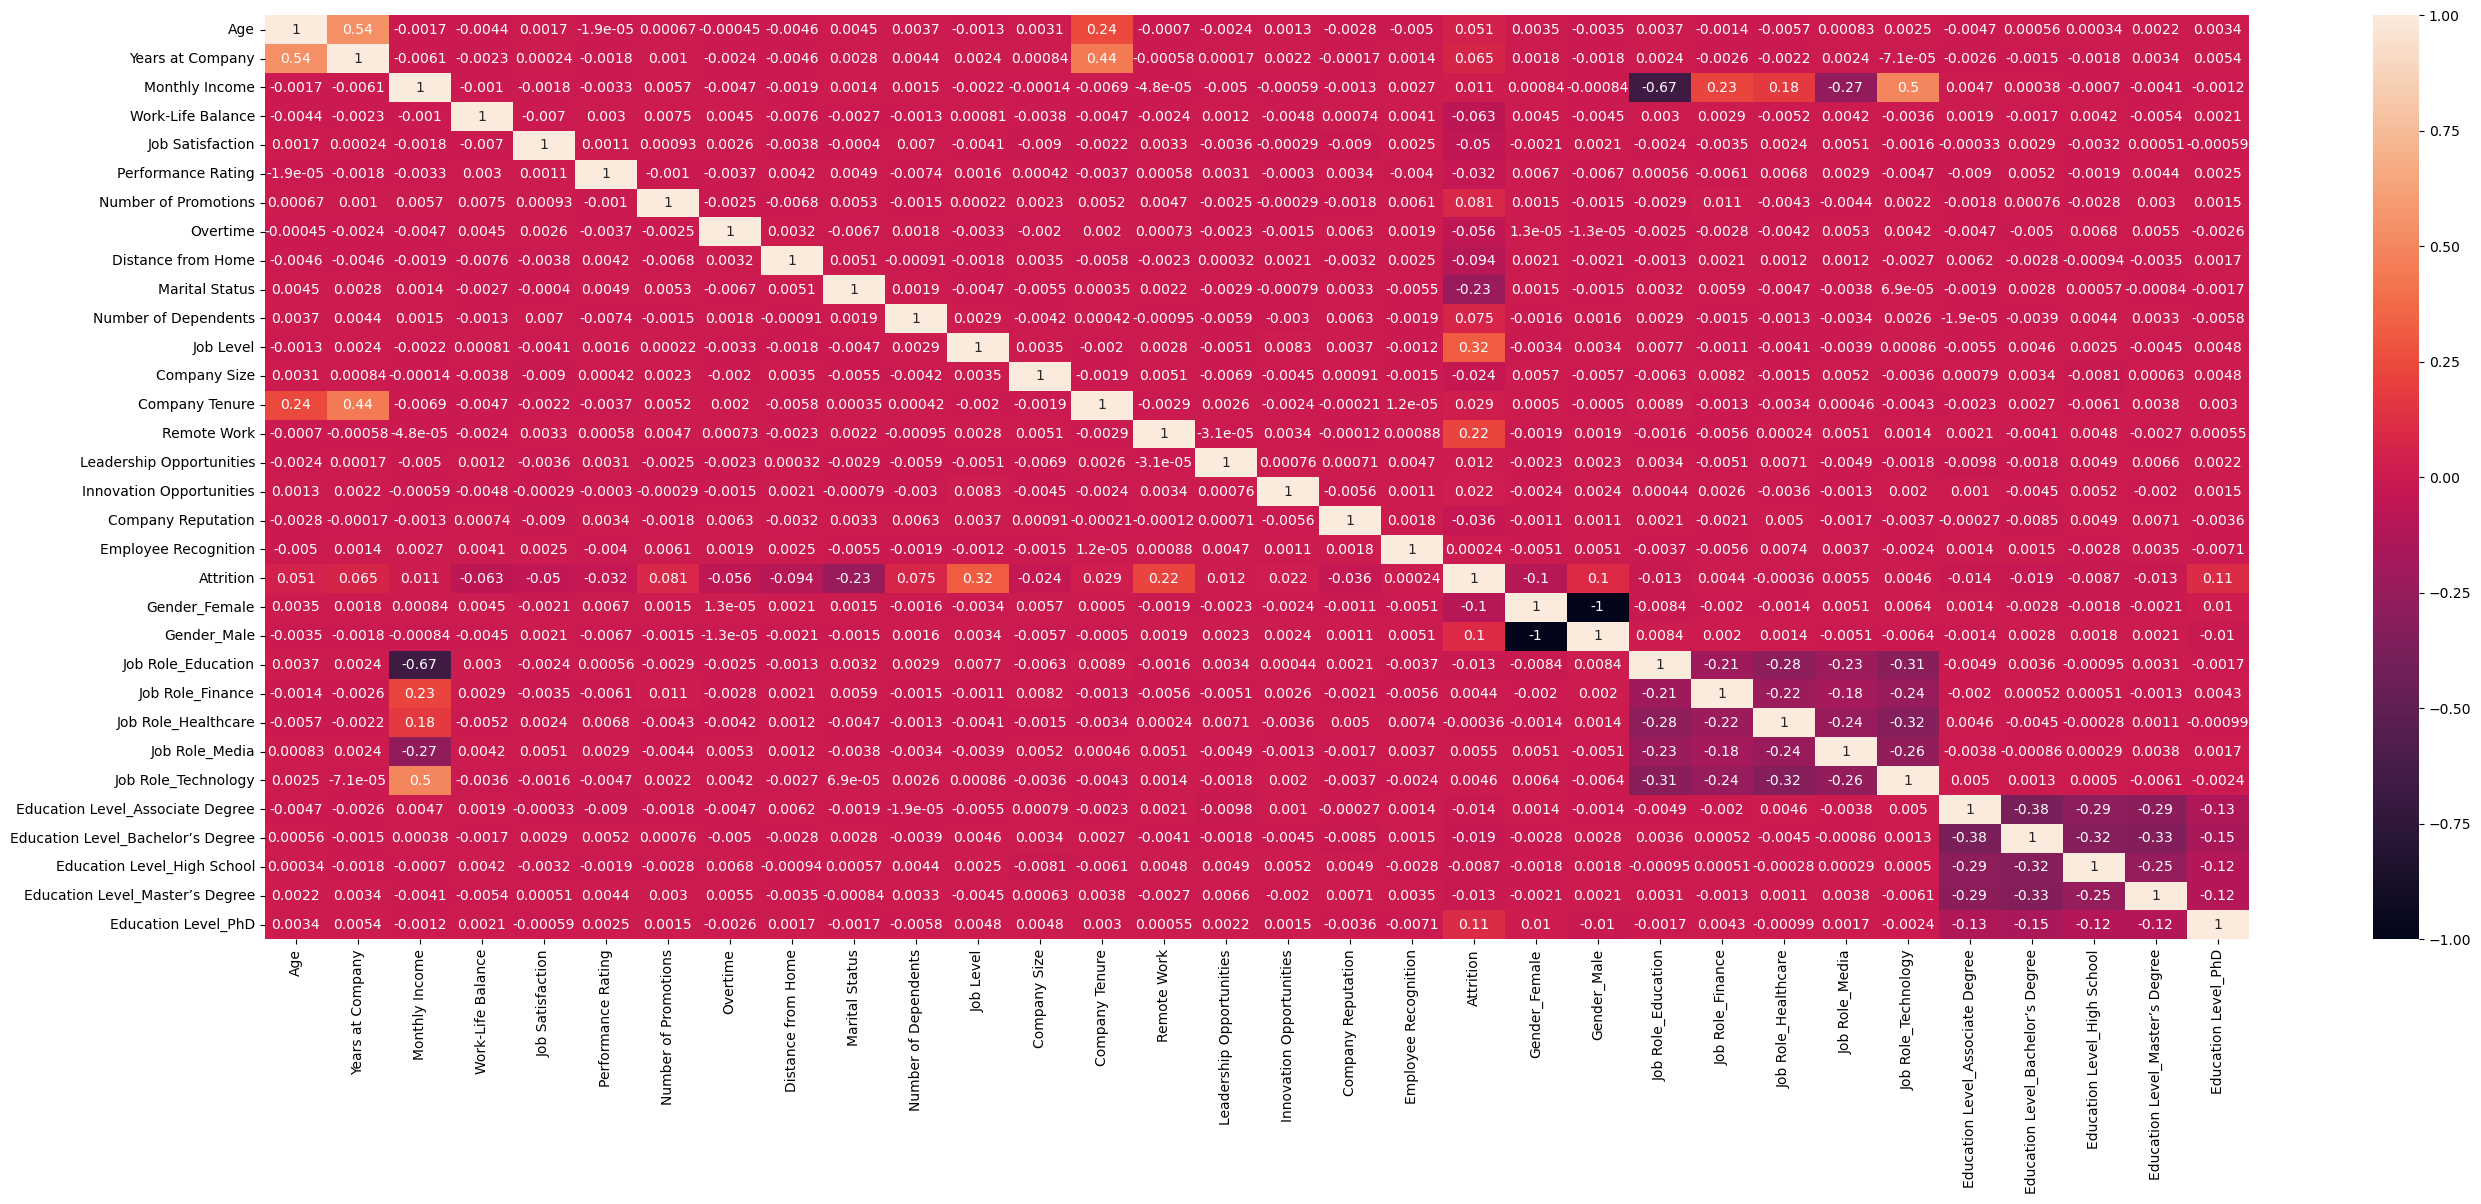

In [29]:
plt.figure(figsize=(32,12))
sns.heatmap(df.corr(),annot=True)

In [30]:
df.drop(['Employee Recognition','Company Size','Company Tenure','Leadership Opportunities','Innovation Opportunities','Company Reputation','Job Role_Education','Job Role_Finance','Job Role_Healthcare','Job Role_Media','Job Role_Technology','Performance Rating'],axis=1,inplace=True)

## x y Split

In [32]:
y=df['Attrition']
x=df.drop(['Attrition'],axis=1)

## Standard Scaling

In [34]:
sc=StandardScaler()
x_sc=sc.fit_transform(x)

## Outlier Handling

<Axes: >

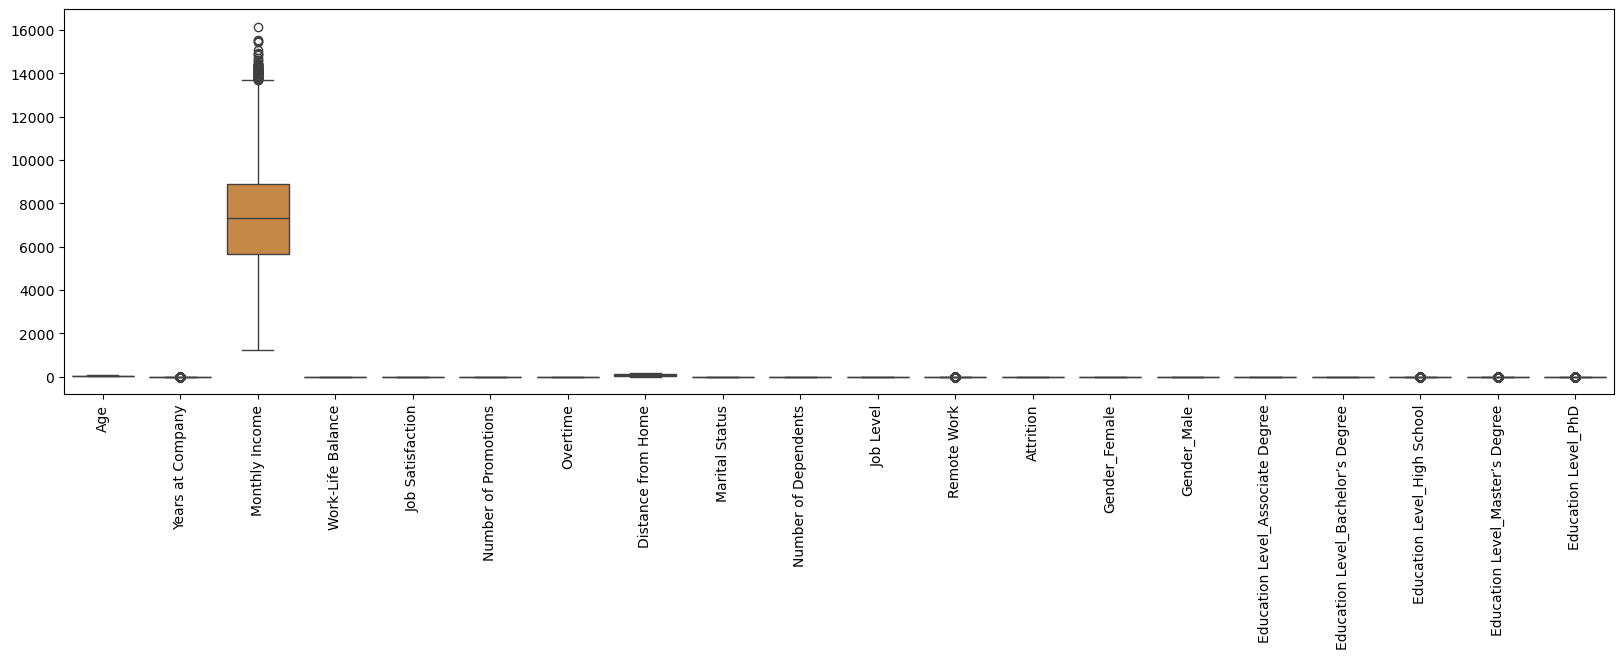

In [40]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.boxplot(df)

In [41]:
for i in df:
    q1=np.percentile(df[i],25,method='midpoint')
    q3=np.percentile(df[i],75,method='midpoint')
    iqr=q3-q1
    low_lim=q1-1.5*iqr
    upp_lim=q3+1.5*iqr
    df[i]=df[i].clip(lower=low_lim,upper=upp_lim)

<Axes: >

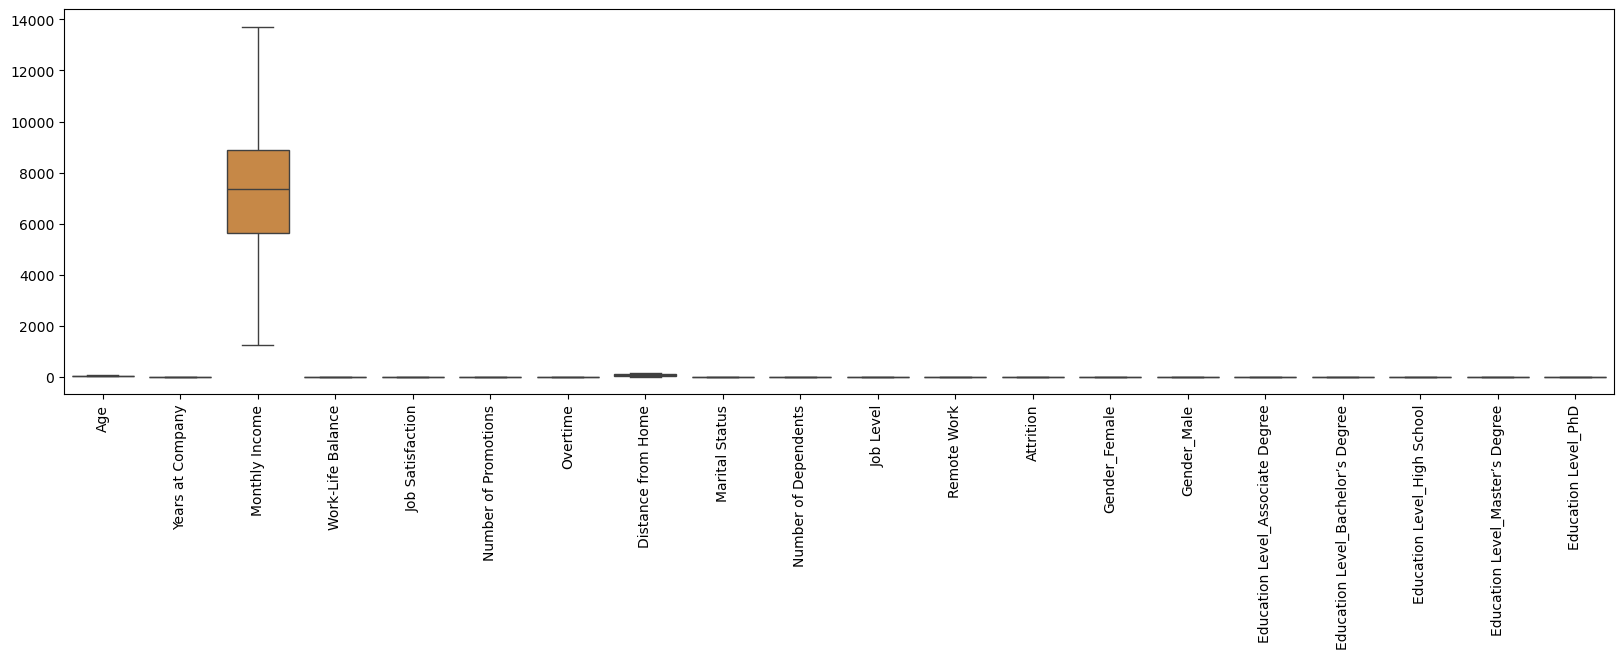

In [42]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.boxplot(df)

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x_sc,y,random_state=42,test_size=0.2)

## Random Forest

In [49]:
rf=RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9, 1],
    'max_features': ['sqrt', None]
}
rf_cv=RandomizedSearchCV(rf,param_grid)
rf_cv.fit(x_train,y_train)
rf_cv.best_params_

{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 9}

In [51]:
rf=RandomForestClassifier(n_estimators= 200, max_features= 'sqrt', max_depth= 9)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)

In [53]:
metric=['Train accuracy','Test accuracy','Precision','Recall','F1 score','roc_auc ']
Table=pd.DataFrame([[rf.score(x_train,y_train)],[accuracy_score(y_test,rf_pred)],[precision_score(y_test,rf_pred)],[recall_score(y_test,rf_pred)],[f1_score(y_test,rf_pred)],[roc_auc_score(y_test,rf_pred)]],columns=['Random forest'])
Table.index=metric
Table

,Random forest
Train accuracy,0.755814
Test accuracy,0.747383
Precision,0.756801
Recall,0.762814
F1 score,0.759796
roc_auc,0.746613


In [55]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73      7096
           1       0.76      0.76      0.76      7804

    accuracy                           0.75     14900
   macro avg       0.75      0.75      0.75     14900
weighted avg       0.75      0.75      0.75     14900



## Decision Tree

In [58]:
dt=DecisionTreeClassifier()
param_grid={'max_depth':[10,20,30],
           'min_samples_split':[2,5,10],
           'min_samples_leaf':[1,2,4]}
dt_cv=RandomizedSearchCV(dt,param_grid)
dt_cv.fit(x_train,y_train)
dt_cv.best_params_

{'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10}

In [60]:
dt=DecisionTreeClassifier(min_samples_split=10, min_samples_leaf= 4, max_depth= 10)
dt.fit(x_train,y_train)
dt_pred=rf.predict(x_test)

In [62]:
metric=['Train accuracy','Test accuracy','Precision','Recall','F1 score','roc_auc ']
Table=pd.DataFrame([[dt.score(x_train,y_train)],[accuracy_score(y_test,dt_pred)],[precision_score(y_test,dt_pred)],[recall_score(y_test,dt_pred)],[f1_score(y_test,dt_pred)],[roc_auc_score(y_test,dt_pred)]],columns=['Decision Tree'])
Table.index=metric
Table

,Decision Tree
Train accuracy,0.750696
Test accuracy,0.747383
Precision,0.756801
Recall,0.762814
F1 score,0.759796
roc_auc,0.746613


In [64]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73      7096
           1       0.76      0.76      0.76      7804

    accuracy                           0.75     14900
   macro avg       0.75      0.75      0.75     14900
weighted avg       0.75      0.75      0.75     14900



## Xgboost

In [67]:
xg=XGBClassifier()
param_grid = {
     'n_estimators': [100, 500, 200],
    'max_depth': [3, 4, 1 ,9],
    'learning_rate': [0.05, 0.1,0.8],
}
xg_cv=RandomizedSearchCV(xg,param_grid)
xg_cv.fit(x_train,y_train)
xg_cv.best_params_

{'n_estimators': 500, 'max_depth': 1, 'learning_rate': 0.8}

In [69]:
xg=XGBClassifier(
  n_estimators= 500,
  max_depth= 1,
  learning_rate= 0.8,
 )
xg.fit(x_train, y_train)
xg_pred=xg.predict(x_test)

In [71]:
metric=['Train accuracy','Test accuracy','Precision','Recall','F1 score','roc_auc ']
Table=pd.DataFrame([[xg.score(x_train,y_train)],[accuracy_score(y_test,xg_pred)],[precision_score(y_test,xg_pred)],[recall_score(y_test,xg_pred)],[f1_score(y_test,xg_pred)],[roc_auc_score(y_test,xg_pred)]],columns=['XG Boost'])
Table.index=metric
Table

,XG Boost
Train accuracy,0.752978
Test accuracy,0.758591
Precision,0.768612
Recall,0.771271
F1 score,0.769939
roc_auc,0.757958


In [73]:
print(classification_report(y_test,xg_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75      7096
           1       0.77      0.77      0.77      7804

    accuracy                           0.76     14900
   macro avg       0.76      0.76      0.76     14900
weighted avg       0.76      0.76      0.76     14900



Text(50.722222222222214, 0.5, 'actual')

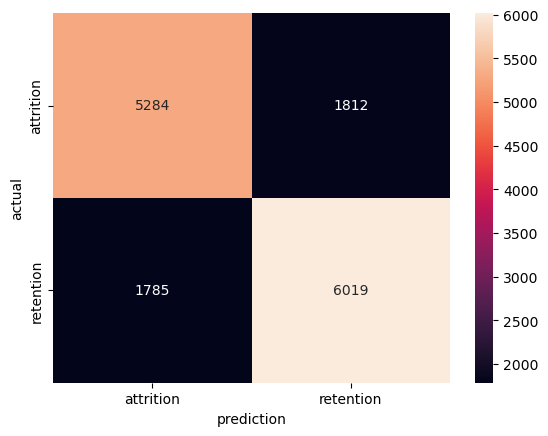

In [75]:
sns.heatmap(confusion_matrix(y_test,xg_pred),annot=True,fmt='g',
           xticklabels=['attrition','retention'],
           yticklabels=['attrition','retention'])
plt.xlabel('prediction')
plt.ylabel('actual')

In [77]:
with open('model.pkl','wb')as model_file:
    pickle.dump(xg,model_file)